# Predicting the percentage of a student in correspondance to the hours he has studied

In [1]:
#Importing Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Calling the data from the URL

URL = "http://bit.ly/w-data"
data = pd.read_csv(URL)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
#Checking no. of rows and columns
data.shape

(25, 2)

In [5]:
#Finding null values in the dataset
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

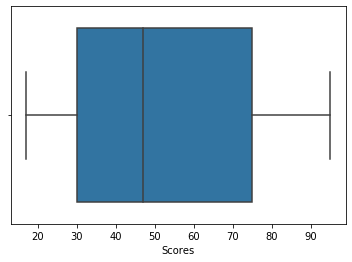

In [6]:
#Checking for outliers in the dataset
plt.figure()
sns.boxplot(x='Scores',data=data)
plt.show()

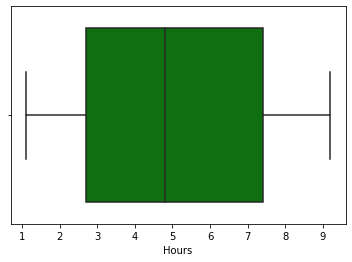

In [7]:
plt.figure()
sns.boxplot(x='Hours',color='green',data=data)
plt.show()

In [8]:
#No outliers in the dataset

# Visualizing the Dataset

In [9]:
#Plotting score distribution

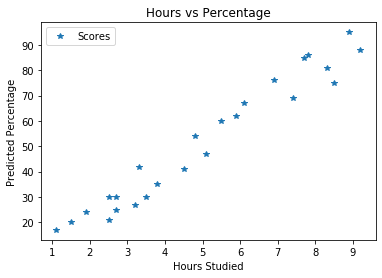

In [10]:
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Predicted Percentage')  
plt.show()

In [11]:
#It is evident from the graph that there is a positive Linear co-relation between the "Hours Studied" and the "Pecentage Obtained"

# Preparing the Data

In [12]:
#Now we  divide the data into "inputs" & "Outputs"
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

In [13]:
print(x)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [14]:
print(y)

[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


In [15]:
#Using the train_test_split() method to split the data into training and testing dataset.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

# Training the Algorithm

In [16]:
#After splitting the data, we train the model to obtain an algorithm

In [17]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

LinearRegression()

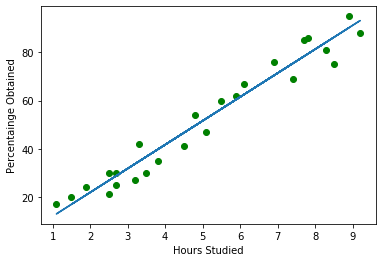

<Figure size 720x720 with 0 Axes>

In [18]:
#Plotting the Regressor Line
line = lr.coef_*x+lr.intercept_

#Ploting the test dataset
plt.scatter(x, y,color='green')
plt.plot(x, line)
plt.xlabel('Hours Studied')
plt.ylabel("Percentainge Obtained")
plt.figure(figsize=(10,10))
plt.show()

# Predicting
 - After training the model, we now make predictions based on the obtained algorithm 

In [19]:
print(X_test) # Testing data - In Hours
y_pred = lr.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [20]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [21]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


# Evaluating the model

In [22]:
#The final step is to evaluate the performance of algorithm. 
#This step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [23]:
from sklearn import metrics  
mse= metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:', mse)

Mean Absolute Error: 4.18385989900298


In [24]:
print("Root Mean Squared Eroor: ", np.sqrt(mse))

Root Mean Squared Eroor:  2.0454485813637504
